# Analítica de datos
# Examen Final
# Leider Stiven Calvo Gómez, A00012140; Daniel Arboleda Manyoma, A00043832; Bryan Franco Sarasty, A00335284 </font>

# Problema


Usted es el encargado de analítica de una empresa de telefonía celular y tiene que proporcionar soluciones para hacer frente a las problemáticas de un sector que ha llegado a saturación del mercado. Tanto su empresa como sus competidores directos tienen que disputarse por una base de clientes limitada, de tal forma que usted tiene que responder a un objetivo estratégico definido por la dirección así: 
“Mantener y fidelizar a nuestros clientes por medio de un servicio de calidad que se adapte a sus necesidades particulares.”
Su compañía dispone de una base de datos histórica de personas que hace un año eran clientes propios. Algunos de esos clientes siguen siéndolo hoy en día, otros ya no lo son.
Se han identificado dos proyectos de analítica de datos que permitirán alcanzar tal objetivo, que tendrá que desarrollar en las dos partes siguientes. 

## Parte 1. 

Cree un modelo predictivo de deserción que permita identificar los clientes propensos a irse a las empresas en directa competencia con la suya en el próximo año. 
1.	¿Encuentra alguna anomalía en los datos? (0.3) 
2.	La empresa considera que los valores de variables que estén a más de 4 desviaciones estándar del promedio deberían ser consideradas excepcionales, y por lo tanto no se deben considerar en los análisis. Identifíquelas y apártelas del dataset (0.3) 
3.	Analice la correlación entre las variables y explique lo que puede implicar desde el punto de vista de PCA. (0.2) 
4.	Debe entrenar 3 tipos de modelos predictivos de diferentes familias: 
- 1.	Defina el protocolo de evaluación que va a utilizar para calibrar los modelos y estimar la calidad del modelo final. (0.3) 
- 2.	Establezca las métricas que va a utilizar, justificando su escogencia (0.2) 
- 3.	Calibre 3 tipos de modelos diferentes: K-NN, árbol de decisión y algún otro que propongan, utilizando las métricas y protocolo definido (1.0) 
- 4.	Evalúe los 3 modelos encontrados, escoja el mejor, explicando y concluyendo lo que encontró, utilizando las métricas y protocolo definido (0.5) 


### Diccionario de datos: 

-  ESTADO: Describe si el usuario sigue con la compañía (VINCULADO) o no (RETIRADO) 
-  INGRESOS: Promedio de ingresos del cliente en pesos 
-  CASA: Precio de la casa en la que vive el cliente en pesos 
-  PRECIO_DISPOSITIVO: Precio del celular del cliente en pesos 
-  MESES: Antigüedad del usuario en meses 
-  DURACION: Promedio de duración de las llamadas hechas por el cliente en minutos 
-  SOBRECARGO: Promedio de minutos que se sobrepasa el usuario en un mes 
-  SALDO_RESTANTE: Promedio de minutos de su plan que le quedan al usuario sin utilizar cada mes 
-  SATISFACCION: nivel de satisfacción del usuario de 0 a 10 (muy satisfecho), obtenido a partir de una encuesta. 

### Consideraciones: 

-  Entregar un archivo pptx y ipynb únicamente. Subirlo al link habilitado en moodle
-  El proyecto es por grupos de máximo 2 personas. 
-  Fecha de entrega: 5 de mayo.
- La sustentación tendrá una duración de 25 minutos por equipo.
-  No olvidar responder a los puntos formulados. Hacer evidente en su pptx la respuesta de las mismas.
-  Por favor limitarse en las explicaciones y justificaciones necesarias durante la sustentación. 
-  Por favor limitarse en los gráficos utilizados, escogiendo únicamente los que tengan una importancia argumentativa. 



# Desarrollo de los puntos

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
from collections import Counter

from sklearn import tree, neighbors, datasets, metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut #Iteradores de C-V

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_samples, silhouette_score, calinski_harabaz_score
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Carga de los datos y análisis exploratorio

In [32]:
data = pd.read_csv('PF-02-DatosTelco.csv', sep = ",")
data.head()

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,VINCULADO,4074840,8.830000e+08,1444153.0,26,2.3,11.167542,20.3,1.762872
1,VINCULADO,8574088,1.745000e+09,2157661.0,23,3.7,0.000000,53.5,3.361266
2,RETIRADO,795993,9.500000e+07,452809.0,38,16.8,350.610224,13.9,8.359438
3,RETIRADO,8115015,8.300000e+07,2617184.0,37,17.6,230.913888,45.7,8.964017
4,RETIRADO,8187499,6.770000e+08,666069.0,19,0.0,131.541983,67.2,8.808206


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23162 entries, 0 to 23161
Data columns (total 9 columns):
ESTADO                23162 non-null object
INGRESOS              23162 non-null int64
CASA                  23162 non-null float64
PRECIO_DISPOSITIVO    23162 non-null float64
MESES                 23162 non-null int64
DURACION              23162 non-null float64
SOBRECARGO            23162 non-null float64
SALDO_RESTANTE        23162 non-null float64
SATISFACCION          23162 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.6+ MB


**No hay Missing values**

Veremos la distribución de los datos

In [34]:
data.describe(include="all")

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
count,23162,2.316200e+04,2.316200e+04,2.316200e+04,23162.000000,23162.000000,23162.000000,23162.000000,23162.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,RETIRADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,11665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.813115e+06,7.161435e+08,1.315340e+06,24.197133,9.609852,110.056296,42.991888,5.480840
std,NaN,2.737374e+06,4.811551e+08,7.485700e+05,14.264014,7.040007,100.771503,30.204540,2.809938
min,NaN,1.500000e+05,8.000000e+07,2.000000e+05,0.000000,0.000000,0.000000,0.000000,0.613580
25%,NaN,2.156296e+06,3.570000e+08,6.571840e+05,14.000000,2.100000,12.566883,15.200000,2.705504
50%,NaN,6.137553e+06,6.240000e+08,1.237456e+06,24.000000,14.600000,75.383640,37.650000,4.064550
75%,NaN,7.347180e+06,9.077500e+08,1.829581e+06,34.000000,16.100000,201.550049,70.000000,8.268244


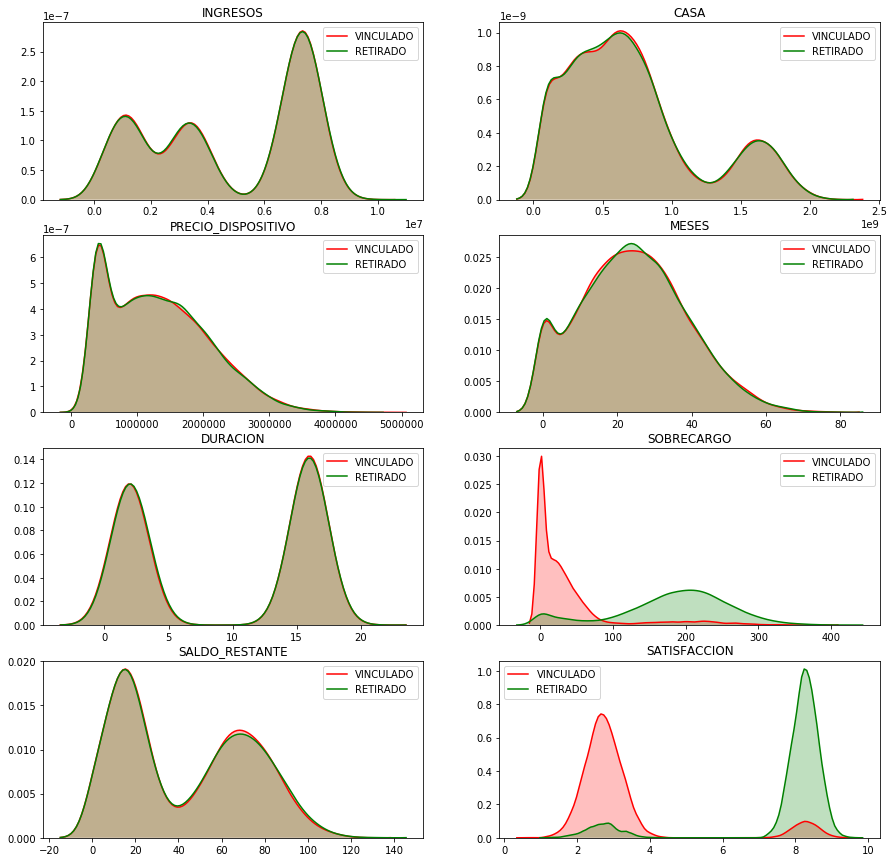

In [35]:
fig = plt.figure(figsize=(15,15))
i=1

for var_num in data.columns[1:9]:
    ax = fig.add_subplot(4, 2, i) #Defino una tabla de 2 filas por 2 columnas, agrego el i-ésimo plot
    #sns.boxplot(y=var_num, data=data)
    #sns.distplot(data[var_num])
    sns.kdeplot(data[data['ESTADO']=='VINCULADO'][var_num], shade=True, color='r', ax=ax);
    sns.kdeplot(data[data['ESTADO']=='RETIRADO'][var_num], shade=True, color='g', ax=ax);
    plt.title(var_num)
    plt.legend(['VINCULADO', 'RETIRADO'])
    i+=1

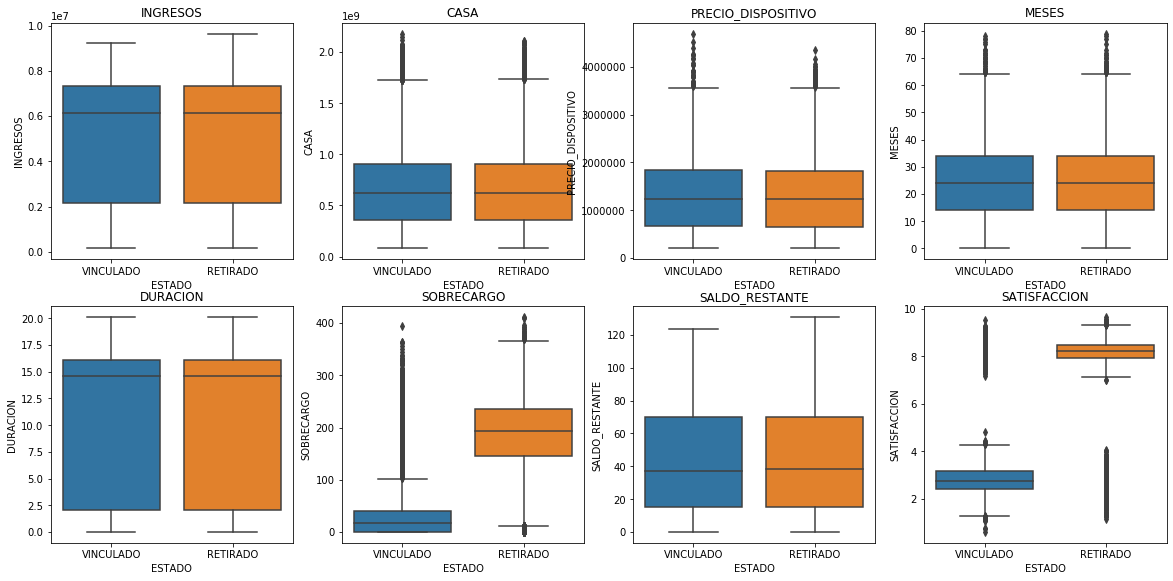

In [36]:
fig = plt.figure(figsize=(20,20))
i=1

for var_num in data.columns[1:9]:
    ax = fig.add_subplot(4, 4, i) #Defino una tabla de 2 filas por 2 columnas, agrego el i-ésimo plot
    sns.boxplot(x=data.ESTADO, y=var_num, data=data)
    plt.title(var_num)
    i+=1    

Los datos estan suficientemente balanceados respecto a cada una de las variables

## Solución de problemas

## **Tipos de datos**

In [37]:
data.CASA = data.CASA.astype('int')
data.PRECIO_DISPOSITIVO = data.PRECIO_DISPOSITIVO.astype('int')

#data.SATISFACCION = np.around(data.SATISFACCION)
#data.SATISFACCION = data.SATISFACCION.astype('int')
#data.SATISFACCION = data.SATISFACCION.astype('str')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23162 entries, 0 to 23161
Data columns (total 9 columns):
ESTADO                23162 non-null object
INGRESOS              23162 non-null int64
CASA                  23162 non-null int64
PRECIO_DISPOSITIVO    23162 non-null int64
MESES                 23162 non-null int64
DURACION              23162 non-null float64
SOBRECARGO            23162 non-null float64
SALDO_RESTANTE        23162 non-null float64
SATISFACCION          23162 non-null float64
dtypes: float64(4), int64(4), object(1)
memory usage: 1.6+ MB


**Estos fueron considerados problemas dado que el precio de los mercados no se manejan en decimales, es decir,  no compramos cosas por 0.5 pesos** Por otro lado, creimos que la variable era categorica dado que proviene de una encuesta, sin embargo, dejarlo en escala continua no afecta el proceso de su interpretación, dado que aun se pueden encontrar medias, promedios, maximos y demás, antes bien pasarlo a int o categorico limita las acciones que podemos lograr con la variable.

## **Datos duplicados**

In [38]:
a = data.duplicated()
a = a.replace(True, 1)
a = a.replace(False, 0)
a.sum()

0.0

Todos los registros del dataset son unicos

## **valores excepcionales**

In [39]:
for var in data.columns[1:9]:
    print( var )
    std = np.std(data[var])
    mean = np.mean(data[var])
    is_bigger = data.loc[:, var] > ( mean + (4* std) )
    is_bigger = is_bigger.replace(True, 1)
    is_bigger = is_bigger.replace(False, 0)
    print (is_bigger.sum())
    
    is_smaller = data.loc[:, var] < ( mean - (4* std) )
    is_smaller = is_smaller.replace(True, 1)
    is_smaller = is_smaller.replace(False, 0)
    print (is_smaller.sum())
    
    print()

INGRESOS
0.0
0.0

CASA
0.0
0.0

PRECIO_DISPOSITIVO
4.0
0.0

MESES
0.0
0.0

DURACION
0.0
0.0

SOBRECARGO
0.0
0.0

SALDO_RESTANTE
0.0
0.0

SATISFACCION
0.0
0.0



In [40]:
for x in [0,0,0,0]:
    id = data[['PRECIO_DISPOSITIVO']].idxmax()
    print(id.PRECIO_DISPOSITIVO)
    data = data.drop([id.PRECIO_DISPOSITIVO],axis=0)

18689
8003
18018
21449


**Encontramos que sólo en la columna "PRECIO_DISPOSITIVO" habian valores fuera del rango superior o inferior de las 4 desviaciones estandar, así que de acuerdo con el planteamiento de la empresa, se eliminaron.**

In [41]:
data_pure = data

### Normalización

In [42]:
for var in data.columns[1:9]:
    print( var )
    data[var] = data[var] / data[var].max()
data.head(5)

INGRESOS
CASA
PRECIO_DISPOSITIVO
MESES
DURACION
SOBRECARGO
SALDO_RESTANTE
SATISFACCION


,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,VINCULADO,0.422263,0.405046,0.337800,0.329114,0.114428,0.027161,0.155318,0.182821
1,VINCULADO,0.888507,0.800459,0.504695,0.291139,0.184080,0.000000,0.409334,0.348584
2,RETIRADO,0.082486,0.043578,0.105916,0.481013,0.835821,0.852717,0.106350,0.866926
3,RETIRADO,0.840934,0.038073,0.612182,0.468354,0.875622,0.561604,0.349656,0.929625
4,RETIRADO,0.848445,0.310550,0.155799,0.240506,0.000000,0.319922,0.514155,0.913466


**De manera que las variables tengan los mismos pesos dentro del análisis de correlación y posteriormente en la definición de componentes principales para PCA, se normalizan los datos, conservando sus distribuciones, ya que estas aportan a la clusterización**

### **Corrrelaciones**

In [43]:
data_vin = data.loc[data['ESTADO'] == 'VINCULADO' ]
data_vin= pd.DataFrame({"ESTADO":data_vin.ESTADO, "INGRESOS": data_vin.INGRESOS,"CASA":data_vin.CASA, "PRECIO_DISPOSITIVO":data_vin.PRECIO_DISPOSITIVO, "MESES":data_vin.MESES, "DURACION":data_vin.DURACION, "SOBRECARGO":data_vin.SOBRECARGO, "SALDO_RESTANTE":data_vin.SALDO_RESTANTE, "SATISFACCION":data_vin.SATISFACCION})
data_ret = data.loc[data['ESTADO'] == 'RETIRADO' ]
data_ret= pd.DataFrame({"ESTADO":data_ret.ESTADO, "INGRESOS": data_ret.INGRESOS,"CASA":data_ret.CASA, "PRECIO_DISPOSITIVO":data_ret.PRECIO_DISPOSITIVO, "MESES":data_ret.MESES, "DURACION":data_ret.DURACION, "SOBRECARGO":data_ret.SOBRECARGO, "SALDO_RESTANTE":data_ret.SALDO_RESTANTE, "SATISFACCION":data_ret.SATISFACCION})

In [44]:
#method='pearson'
cor_matrix_gen = data.corr()
cor_matrix_vin = data_vin.corr()
cor_matrix_ret = data_ret.corr()
#cor_matrix.iloc[0][0]
cor_matrix_gen

,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
INGRESOS,1.000000,0.384465,-0.006736,-0.005715,-0.158182,-0.000666,0.844883,0.002619
CASA,0.384465,1.000000,0.001439,-0.002846,-0.063700,0.003249,0.326608,0.002450
PRECIO_DISPOSITIVO,-0.006736,0.001439,1.000000,-0.001461,0.011556,0.005013,-0.004230,-0.000413
MESES,-0.005715,-0.002846,-0.001461,1.000000,0.007094,0.004717,-0.003614,0.002726
DURACION,-0.158182,-0.063700,0.011556,0.007094,1.000000,0.001898,0.046901,0.000928
SOBRECARGO,-0.000666,0.003249,0.005013,0.004717,0.001898,1.000000,0.002447,0.889806
SALDO_RESTANTE,0.844883,0.326608,-0.004230,-0.003614,0.046901,0.002447,1.000000,0.004330
SATISFACCION,0.002619,0.002450,-0.000413,0.002726,0.000928,0.889806,0.004330,1.000000


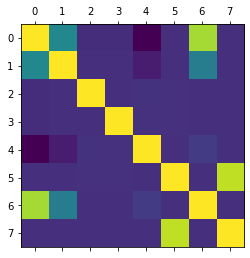

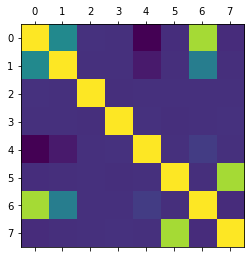

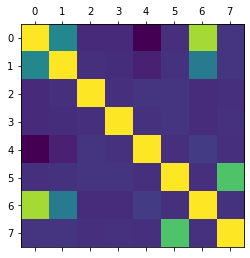

In [45]:
plt.matshow(cor_matrix_gen)
plt.matshow(cor_matrix_vin)
plt.matshow(cor_matrix_ret)

Text(0, 0.5, 'SATISFACCION')

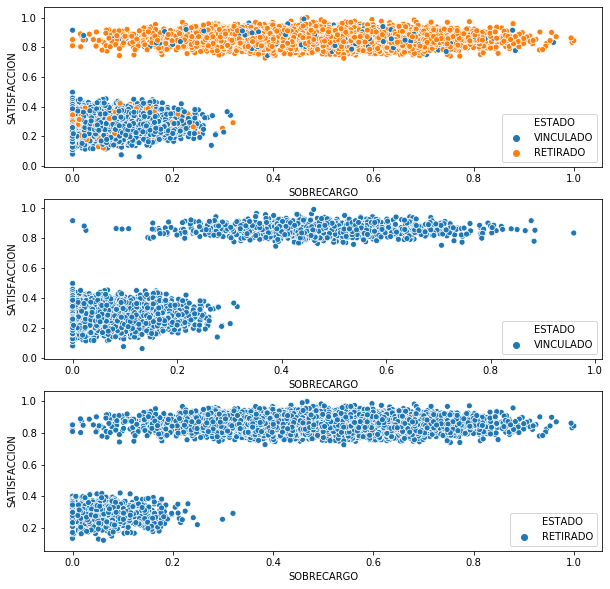

In [46]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(3,1, 1)
#plt.plot(data['SOBRECARGO'], data['SATISFACCION'], 'bo')
sns.scatterplot(x="SOBRECARGO", y="SATISFACCION", hue="ESTADO", data=data, ax=ax)
ax = fig.add_subplot(3,1, 2)
#plt.plot(data_vin['SOBRECARGO'], data_vin['SATISFACCION'], 'bo')
sns.scatterplot(x="SOBRECARGO", y="SATISFACCION", hue="ESTADO", data=data_vin, ax=ax)
ax = fig.add_subplot(3,1, 3)
#plt.plot(data_ret['SOBRECARGO'], data_ret['SATISFACCION'], 'bo')
sns.scatterplot(x="SOBRECARGO", y="SATISFACCION", hue="ESTADO", data=data_ret, ax=ax)
plt.xlabel('SOBRECARGO')
plt.ylabel('SATISFACCION')

#### **Se realizó el análisis de manera general y según los valores de ESTADO, ya que era posible hallar diferentes tipos de relaciones, sin embargo, los cambios no son significativos**

**Según los coeficientes de correlación dados para cada combinación, se destacan los siguientes hallazgos:**
- Sorpresivamente la cantidad de meses o antiguedad de los usuarios no está relacionada con la satisfacción del mismo, incluso no se relaciona con ninguna otra variable.
- La duración promedio de llamadas tampoco afecta la satisfacción.
- Como era de esperarse el sobrecargo si está directa y fuertemente relacionada con la satisfacción.
- El saldo restante se relaciona directamente con los ingresos.

**De ello se puede concluir respectivamente que:**
- Se puede descartar que los usuarios se aburran del servicio y se vayan, o que el proceso de conocimiento y aceptación del mismo sea muy lento y por eso se vayan.
- Las personas no están teniendo problemas con el servicio de llamadas, por lo cual no es causal de permanencia o retiro.
- Dado que el coef es igual a 0.889 en el análisis general, se podría decir que a mayor sobrecargo, mayor satisfacción, lo cual suena incoherente y además la grafica demuestra que no necesariamente es así.
- No es tan significativo al retiro de un usuario.

**Estas correlaciones serán determinantes dentro de los componentes principales del _PCA_, complejizando su interpretación, dado que no hay relaciones fuertes directas positivas o negativas que determinen la interpretación de un valor de un componente como consecuencia de otro., Además las fuerzas con las que cada columna va a ser representada dentro de los componentes, va a ser muy similar, exceptuando la columna de sobre cargo que está muy bien diferenciada"** Por ello se va a necesitar tomar demasiados componentes para poder representar una variancia de datos mayor al 80%. por lo cual el uso de PCA se hace innecesario.

In [47]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(data.iloc[:,1:])
print(data.iloc[:,1:].columns)
var_exp = pca.explained_variance_ratio_ # varianza explicada por cada PC
cum_var_exp = np.cumsum(var_exp)

print('----------- Componentes principales', pca.components_)
print('--------------- variance ratio', var_exp)
print('--------------- varience explicada', pca.explained_variance_)
print('--------------- varianza explicada acumulada', cum_var_exp)

Index(['INGRESOS', 'CASA', 'PRECIO_DISPOSITIVO', 'MESES', 'DURACION',
       'SOBRECARGO', 'SALDO_RESTANTE', 'SATISFACCION'],
      dtype='object')
----------- Componentes principales [[ 6.55926494e-01  2.79625244e-01 -5.92924948e-03 -4.79402538e-03
  -5.40350790e-01  3.09013112e-02  4.43858436e-01  3.95959563e-02]
 [-2.77707717e-02 -1.00139767e-02  1.50730285e-03  2.60999342e-03
   4.17612239e-02  6.34807869e-01 -1.47236315e-02  7.70829167e-01]
 [ 3.50264499e-01  1.60423423e-01  4.75963102e-03  2.23400198e-03
   8.32753919e-01 -1.14246961e-02  3.97191848e-01 -1.34344197e-02]
 [-2.23539663e-01  9.45256204e-01  2.25991011e-02  5.52122914e-04
   2.40544090e-02  1.60670525e-03 -2.35414208e-01 -2.94260122e-03]
 [ 2.02431023e-03  1.01085964e-03 -2.47650459e-02  9.99673386e-01
  -4.44337957e-03  5.50466085e-04  1.69649427e-03 -3.43055757e-03]
 [ 7.27314627e-03 -2.04507616e-02  9.99377315e-01  2.46948870e-02
  -7.91194359e-03  5.28258196e-03  6.27397500e-03 -5.84340471e-03]
 [-6.28201286e-01 

**Vemos que los componentes principales, como se suponía estan fuertemente explicados por diferentes variables, en pocos de ellos se encuentran valores cercanos a 0, tanto así que tratar de generar interpretaciones de los mismo es muy complejo, dado que incluyen muchas variables diferentes del dataset**

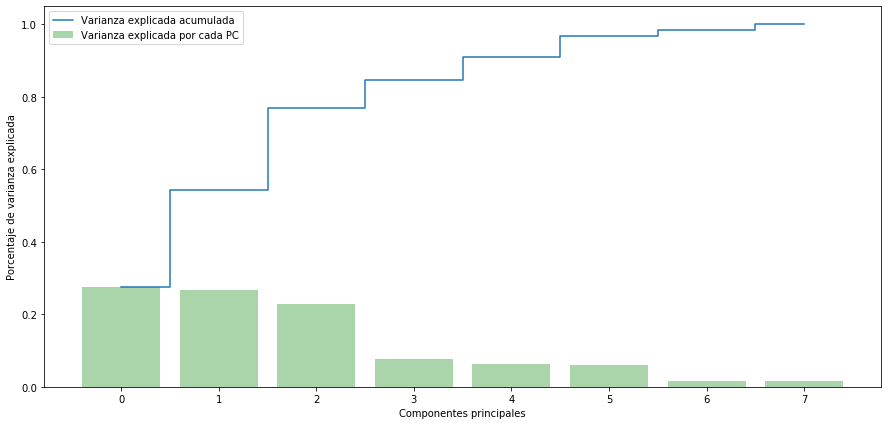

In [48]:
plt.figure(figsize=(15, 7))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='Varianza explicada por cada PC', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.show()

In [49]:
np.sum(pca.explained_variance_ratio_[0:4])

0.8455113058265056

Los componentes principales del 0 al 3 representan el 84% de la varianza en los datos, sin embargo una visualización en 4 dimensiones sigue siendo algo dificil de comprender, por lo cual el uso de PCA no es tan útil en este caso.

### **Modelos predictivos**

### Protocolo de evaluación y Métricas

**Como protocolo de evaluación se decidió hacer un Holdout del dataset en una proporción 70 train / 30 test, de manera que se conservaran suficientes muestras en los conjuntos para tener, tanto un buen aprendizaje del modelo, como una buena evaluación de éste, además, dicha partición de los datos se hizo de manera estratificada, de forma que ambas muestras fueran representativas y de igual distribución respecto de la variable dependiente "ESTADO".**

Respecto de las métricas, se ha decidido tomar del Kappa, como indicador principal, dado que es un índice que es capaz de reflar un poco más que el accuraccy, excluyendo aquellos verdaderos positivos o negativos, que el mismo baseline podría dictar al escoger la clase mayoritaria. Sin embargo, para hacer una mejor medición y escogencia de un K óptimo se siguen diferente protocolos como k-fold o bagging, según el modelo.

In [50]:
data_indep = data.iloc[:, 1:]
X_train, X_test, y_train, y_test = train_test_split(data_indep, data["ESTADO"], test_size=0.3, random_state=12345, stratify=data["ESTADO"])

### **KNN**

In [51]:
#k_vec= np.arange(2,20,2)
k_vec= [6,7,8,9]
k_vec

[6, 7, 8, 9]

In [52]:
for k in k_vec:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    kappa_scorer = metrics.make_scorer(metrics.cohen_kappa_score)
    kp = cross_val_score(knn, X_train, y_train, cv=5, scoring=kappa_scorer)
    #kp = metrics.cohen_kappa_score(y_train, y_pred)
    print(k)
    print(kp)
    print("kapas: %0.2f (+/- %0.2f)" % (kp.mean(), kp.std() * 2))
    print("---------")

6
[0.78719076 0.80073937 0.79517693 0.80071389 0.79758491]
kapas: 0.80 (+/- 0.01)
---------
7
[0.80325438 0.80815802 0.80692078 0.81060468 0.81056848]
kapas: 0.81 (+/- 0.01)
---------
8
[0.80263331 0.80938824 0.80691549 0.81060122 0.80870981]
kapas: 0.81 (+/- 0.01)
---------
9
[0.8069583  0.81186087 0.81123971 0.81492737 0.81365286]
kapas: 0.81 (+/- 0.01)
---------


**7** es el valor de K que más aciertos tiene, entre lo que no es chiripa.
Se evaluo primero a una escala mas grande, y luego sobre estos valores más precisos. Dando como resultado que a partir de k=7 el Kappa no aumenta.

### **Decision Tree Classifier**

In [53]:
k_samples= np.arange(1000,5000,1000);
k_max_depth= [4,5]
k_imp= np.arange(0.0,0.3,0.1);
for max_dep in k_max_depth:
    for imp in k_imp:
        ctree = tree.DecisionTreeClassifier(
            criterion='entropy', # el criterio de particionamiento de un conjunto de datos (gini, entropy)
            max_depth=max_dep,      # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
            min_samples_split=1000, # prepoda: el mínimo número de registros necesarios para crear una nueva rama
            min_samples_leaf=1,  # prepoda: el mínimo número de registros en una hoja
            random_state=1234,   # semilla del generador aleatorio utilizado para 
            max_leaf_nodes=None, # prepoda: máximo número de nodos hojas
            min_impurity_decrease=imp, # prepoda: umbral mínimo de reducción de la impureza para aceptar la creación de una rama
            class_weight=None    # permite asociar pesos a las clases, en el caso de diferencias de importancia entre ellas
        )
        ctree.fit(X_train, y_train)
        kappa_scorer = metrics.make_scorer(metrics.cohen_kappa_score)
        kp = cross_val_score(ctree, X_train, y_train, cv=5, scoring=kappa_scorer)
        print(max_dep)
        print(imp)
        print(kp)
        print("kapas: %0.2f (+/- %0.2f)" % (kp.mean(), kp.std() * 2))
        print("---------")

4
0.0
[0.80819012 0.81371056 0.81000598 0.8161595  0.81488857]
kapas: 0.81 (+/- 0.01)
---------
4
0.1
[0.80819012 0.81371056 0.81185915 0.8161595  0.81488857]
kapas: 0.81 (+/- 0.01)
---------
4
0.2
[0.80819012 0.81371056 0.81185915 0.8161595  0.81488857]
kapas: 0.81 (+/- 0.01)
---------
5
0.0
[0.80819012 0.81371056 0.81000598 0.8161595  0.81488857]
kapas: 0.81 (+/- 0.01)
---------
5
0.1
[0.80819012 0.81371056 0.81185915 0.8161595  0.81488857]
kapas: 0.81 (+/- 0.01)
---------
5
0.2
[0.80819012 0.81371056 0.81185915 0.8161595  0.81488857]
kapas: 0.81 (+/- 0.01)
---------


**Luego de manejar diferentes valores para los parametros "max_depth", "min_samples_split" y "min_impurity_decrease", nos dimos cuenta que el máximo para todas las combinaciones del mismo no supera el 0.81, lo cual no es un mal valor y por lo tanto tomaremos los valores 5, 1000 y 0.0, respectivamente dado que san valores comunmente usados en los parametros y nos dan el maximo kappa**

In [54]:
ctree = tree.DecisionTreeClassifier(
            criterion='entropy', # el criterio de particionamiento de un conjunto de datos (gini, entropy)
            max_depth=5,      # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
            min_samples_split=1000, # prepoda: el mínimo número de registros necesarios para crear una nueva rama
            min_samples_leaf=1,  # prepoda: el mínimo número de registros en una hoja
            random_state=1234,   # semilla del generador aleatorio utilizado para 
            max_leaf_nodes=None, # prepoda: máximo número de nodos hojas
            min_impurity_decrease=0.0, # prepoda: umbral mínimo de reducción de la impureza para aceptar la creación de una rama
            class_weight=None    # permite asociar pesos a las clases, en el caso de diferencias de importancia entre ellas
        )
ctree.fit(X_train, y_train)
data_indep.columns[np.argsort(-ctree.feature_importances_)]

Index(['SATISFACCION', 'CASA', 'SALDO_RESTANTE', 'INGRESOS',
       'PRECIO_DISPOSITIVO', 'MESES', 'DURACION', 'SOBRECARGO'],
      dtype='object')

In [55]:
tree.export_graphviz(ctree, 'tree.dot', feature_names = X_train.columns, filled=True, rounded=True,special_characters=True, class_names=ctree.classes_)

In [56]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(base_estimator = ctree,   # Por defecto un decision tree 
                            n_estimators=200,          # Número de modelos a crear
                            max_samples=0.7,          # Número o % de registros de la muestra de aprendizaje
                            max_features=0.7,         # Número o % de atributos de la muestra de aprendizaje
                            bootstrap=True,           # Utilizar reemplazo en el muestreo de los registros de aprendizaje
                            bootstrap_features=False, # Utilizar reemplazo en el muestreo de los atributos de aprendizaje
                            oob_score=False,          # Evaluar cada modelo con los registros no utilizados en su aprendizaje 
                            n_jobs=2,                 # Número de cores a utilizar
                            random_state=12345,        # random seed para el generador aleatorio
                            verbose=0)                # controla la cantidad de información a reportar

In [57]:
bagging.fit(X_train, y_train)
kappa_scorer = metrics.make_scorer(metrics.cohen_kappa_score)
kp = cross_val_score(bagging, X_train, y_train, cv=5, scoring=kappa_scorer)
print(kp)
print("kapas: %0.2f (+/- %0.2f)" % (kp.mean(), kp.std() * 2))

[0.80819012 0.81371056 0.81185915 0.8161595  0.81488857]
kapas: 0.81 (+/- 0.01)


**Para finalizar el Decision Tree Classifier, decidimos hacer un bagging para limitar el riesgo de mala predicción a valores futuros**

### **NaveBayes**

Dicimos hacer tambien un modelo NaveBayes, dado que es muy simple pero eficaz en clasificación. Según la documentación para distribuciones que no se asumen normales y son distintas entre sí, el Naive Bayes categorico es la mejor opción, dado que se ajusta a cada distribución, si el parametro "fit_prior" lo permite. Sin embargo por alguna razon, python no permite su importación, de manera que se toma el naveBayes guasiano, asumiendo una distribucion normal. Por otro lado, el **alpha** nos va a permitir la variación del calculo respecto al suavizador de laplace 

In [58]:
#from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

alphas = [1, 0.5, 0.1, 0.09, 0.08, 0.07, 0.05, 0.01, 0.005, 0.001, 0.0001]
#alphas= [0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001]
np.random.seed(1234)
for alp in alphas:
    #modelo = CategoricalNB( alpha = alp , fit_prior = True )
    modelo = GaussianNB(var_smoothing = alp)
    modelo.fit(X_train, y_train)
    kappa_scorer = metrics.make_scorer(metrics.cohen_kappa_score)
    kp = cross_val_score(modelo, X_train, y_train, cv=5, scoring=kappa_scorer)
    print(alp)
    print(kp)
    print("kapas: %0.2f (+/- %0.2f)" % (kp.mean(), kp.std() * 2))
    print('--------------------')

1
[0.80819012 0.81371056 0.81185915 0.8161595  0.81488857]
kapas: 0.81 (+/- 0.01)
--------------------
0.5
[0.80819012 0.81371056 0.81185915 0.8161595  0.81488857]
kapas: 0.81 (+/- 0.01)
--------------------
0.1
[0.80819012 0.81371056 0.81185915 0.8161595  0.81488857]
kapas: 0.81 (+/- 0.01)
--------------------
0.09
[0.80819012 0.81371056 0.81185915 0.8161595  0.81488857]
kapas: 0.81 (+/- 0.01)
--------------------
0.08
[0.80819012 0.81371056 0.81185915 0.8161595  0.81488857]
kapas: 0.81 (+/- 0.01)
--------------------
0.07
[0.80819012 0.81371056 0.81185915 0.8161595  0.81488857]
kapas: 0.81 (+/- 0.01)
--------------------
0.05
[0.80819012 0.81371056 0.81185915 0.8161595  0.81488857]
kapas: 0.81 (+/- 0.01)
--------------------
0.01
[0.80819012 0.81371056 0.81185915 0.8161595  0.81488857]
kapas: 0.81 (+/- 0.01)
--------------------
0.005
[0.80819012 0.81371056 0.81185915 0.8161595  0.81488857]
kapas: 0.81 (+/- 0.01)
--------------------
0.001
[0.80819012 0.81371056 0.81185915 0.8161595 

La variacion del kappa es nula para los diferentes valores del laplace, por lo cual se tomará un valor aleatorio dentro del rango como el mejor parametro para el naive bayes.

### **Escogencia del modelo**

Los tres modelos han tenido un mismo rendimiento al ser evaluados con el set de entrenamiento. Kappa = 0.81

In [59]:
y_pred = bagging.predict(X_test)
print("tree - Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))

knn = neighbors.KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Knn - Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))

modelo = GaussianNB(var_smoothing = 0.1)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print("navebayes - Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))

tree - Kappa    :  0.8085792452145433
Knn - Kappa    :  0.8056990632755113
navebayes - Kappa    :  0.8085792452145433


**Al evaluar los modelos con el set de test, es muy curioso encontrar la similitud de Kappa que se encuentre, incluso previamente mientras se ajustaban los parametros de cada uno**. Se tomará como mejor modelo el arbol de decision dado que aunque el naveBayes tiene el mismo capa, ubiese sido mas adecuado hacer navebayes categorico, sin embargo fue imposible que python lo cargara.

# PARTE 2

 Analice los clientes que se han ido, creando un modelo de segmentación de los clientes que desertan la compañía, teniendo en cuenta sus datos socio-demográficos y comportamientos de consumo del servicio de telefonía. Interpretar el perfil de clientes asignado a cada segmento, caracterizándolos de tal manera que le permita sugerir 3 a 5 campañas de fidelización. 
1.	Definición del número de campañas a realizar (0.6) 
2.	Extraiga los componentes principales, analice sus niveles de varianza explicada, e interprete los 3 más importantes en función de las variables originales. (0.6) 
3.	Compare de los clusters obtenidos utilizando K-Means y Clustering jerárquico, seleccionando los resultados de uno de los dos métodos. Justifique. (0.4) 
4.	Caracterice los clusters, etiquetando el segmento; proponga una estrategia de fidelización para cada uno de los clusters. Justifique (0.6) 


In [60]:
pca = PCA()
pca.fit_transform(data_ret.iloc[:,1:])
print(data_ret.iloc[:,1:].columns)
var_exp = pca.explained_variance_ratio_ # varianza explicada por cada PC
cum_var_exp = np.cumsum(var_exp)

print('----------- Componentes principales', pca.components_)
print('--------------- variance ratio', var_exp)
print('--------------- varience explicada', pca.explained_variance_)
print('--------------- varianza explicada acumulada', cum_var_exp)

Index(['INGRESOS', 'CASA', 'PRECIO_DISPOSITIVO', 'MESES', 'DURACION',
       'SOBRECARGO', 'SALDO_RESTANTE', 'SATISFACCION'],
      dtype='object')
----------- Componentes principales [[ 6.64253513e-01  2.76518038e-01 -1.36222323e-02 -8.80207503e-03
  -5.24504030e-01  3.08738967e-03  4.54822217e-01  8.04642509e-03]
 [ 3.34796427e-01  1.61991432e-01  9.30218052e-03  1.91106246e-03
   8.44042293e-01  8.22792255e-03  3.85960861e-01  1.17926900e-02]
 [ 1.62643381e-02 -2.63655657e-02 -2.00477934e-02 -2.62182892e-02
   7.71951141e-03 -7.41237693e-01  1.69454551e-02 -6.69455718e-01]
 [-2.18566891e-01  9.44637151e-01  4.81340277e-02  8.17697018e-03
   1.37932936e-02 -2.15071507e-02 -2.36982814e-01 -2.63012156e-02]
 [ 5.58119711e-03 -6.72316330e-03  1.16961539e-02  9.99451975e-01
  -6.69869754e-03 -1.31980275e-02  8.42406423e-03 -2.43428411e-02]
 [ 1.42545796e-02 -4.35722851e-02  9.98337739e-01 -1.29028790e-02
  -1.58824688e-02 -4.76748745e-03  1.74255677e-02 -2.17923411e-02]
 [ 4.58852832e-03 

Los tres componentes principales más destacados dentro del sub_dataset que incluye solo los retirados son:
- el 0, con una varianza explicada de 0.14 y un ratio del 32%, cuyos pesos se distribuyenen:
   - ingresos: 0.664, duración: -0.524, saldo_restante: 0.454.
- el 1, con una varianza explicada de 0.11 y un ratio del 26%, cuyos pesos se distribuyenen:
   - ingresos: 0.344, duración: 0.84, saldo_restante: 0.38.
 - el 2, con una varianza explicada de 0.11 y un ratio del 26%, cuyos pesos se distribuyenen:
   - sobre_cargo: -0.74, satisfaccion: 0.669.  Convirtiendolo en un componente que podría hablar.

Como vemos, los dos primeros componentes, son casi identicos, pues las mayores pesos vienen de las mismas variables, mientras que el ultimo componente nos habla de la satisfacción de la persona en relación con los cobros extras que se le añaden.

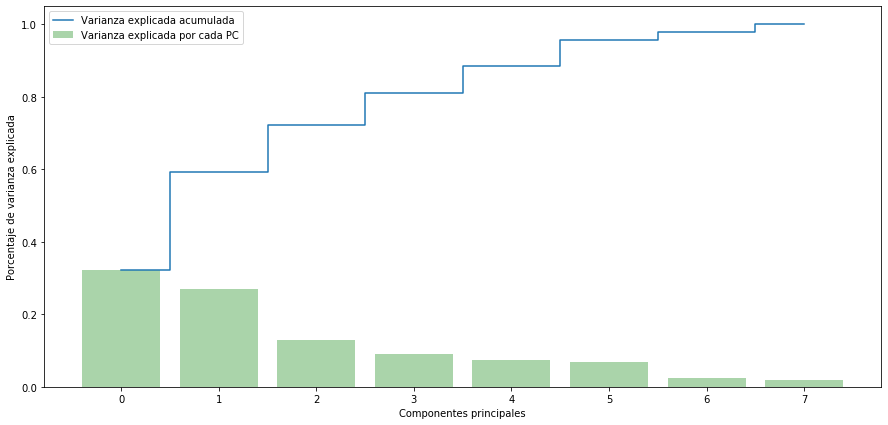

In [61]:
plt.figure(figsize=(15, 7))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='Varianza explicada por cada PC', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.show()

In [62]:
np.sum(pca.explained_variance_ratio_[0:4])

0.8118490661045396

**Para poder obtener una varianza de los datos mayor 80% y lograr que esta sea representativa, al igual que con el data set completo, se requeriría de una visualización en 4 dimensiones**

In [63]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

k_Kmeans= np.arange(3,7,1)
clusters_arr = [0,0,0,0]
i=0

for k in k_Kmeans:
    kmeans = KMeans(n_clusters=k, random_state=12345, n_init=10)
    kmeans.fit(data_ret.iloc[:,1:])
    print(k)
    print("WSS: ", kmeans.inertia_)
    clusters = kmeans.predict(data_ret.iloc[:,1:])
    clusters_arr[i] = clusters
    counter=Counter(clusters)
    print(counter)
    print('-------------')
    i+=1

3
WSS:  2653.7844582986863
Counter({2: 5341, 1: 3362, 0: 2961})
-------------
4
WSS:  2184.0472304954624
Counter({3: 3362, 1: 2961, 2: 2770, 0: 2571})
-------------
5
WSS:  1921.5745031253593
Counter({3: 3070, 0: 2646, 2: 2502, 1: 2308, 4: 1138})
-------------
6
WSS:  1747.4569709608681
Counter({5: 2645, 1: 2502, 2: 2309, 4: 1987, 3: 1117, 0: 1104})
-------------


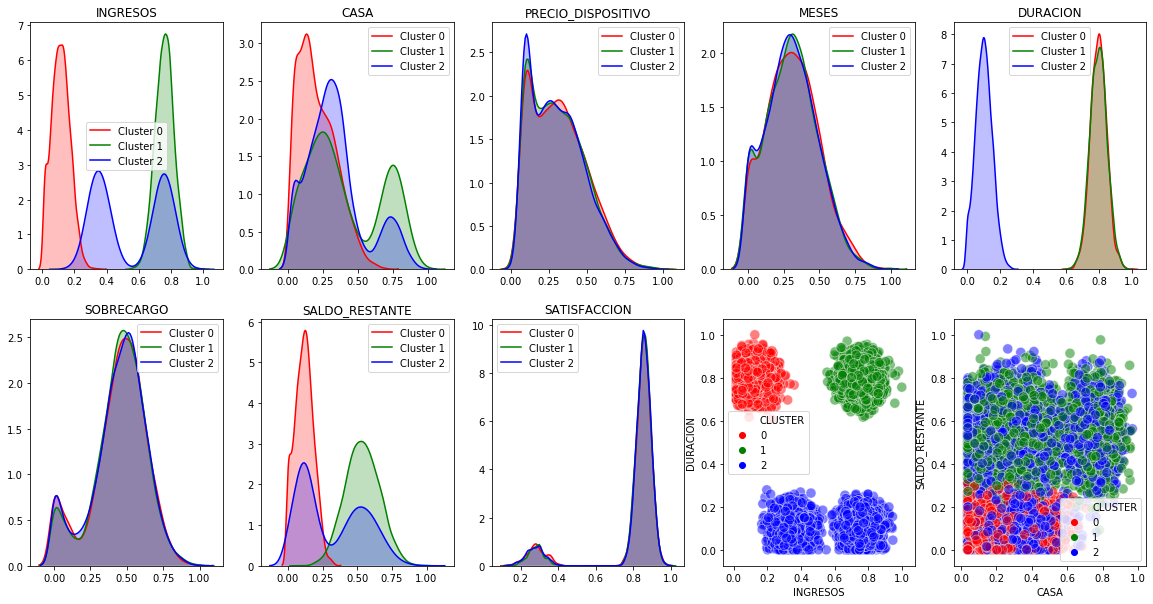

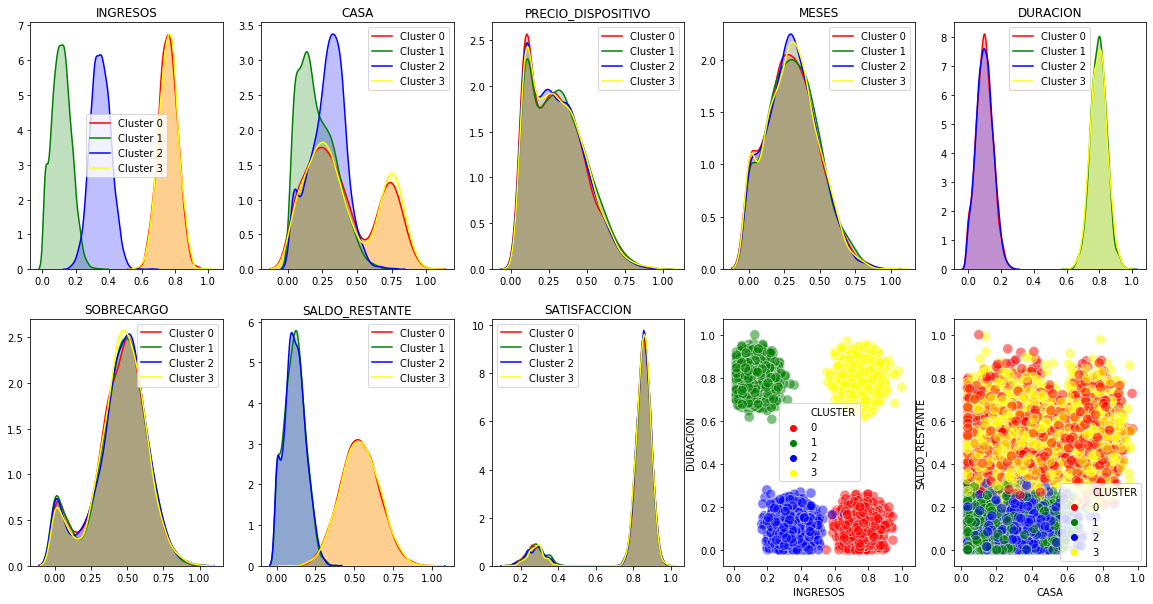

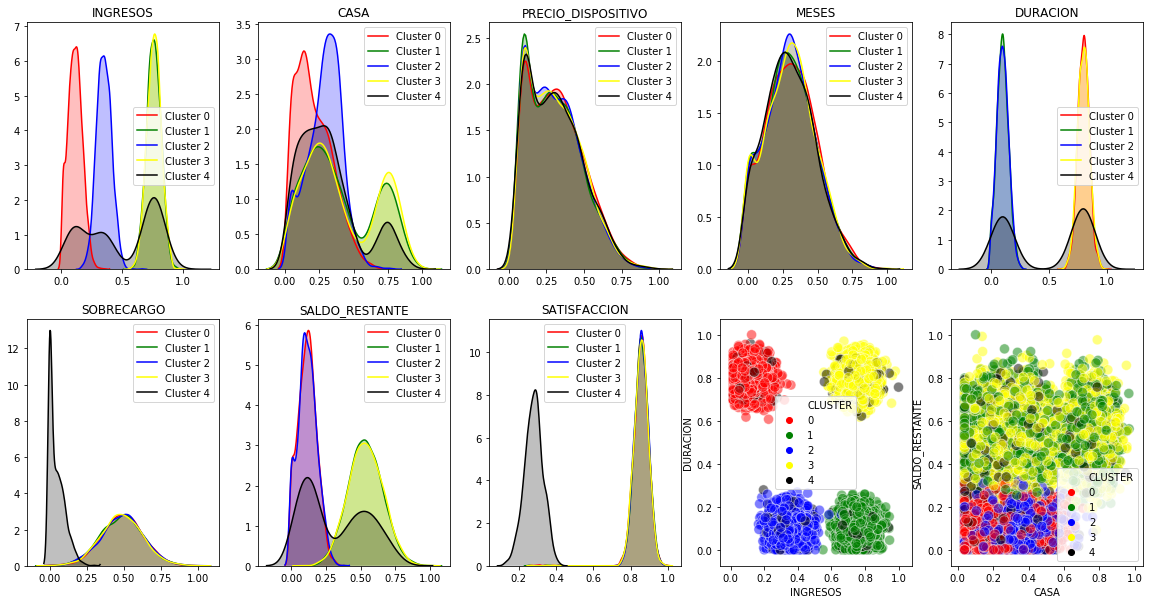

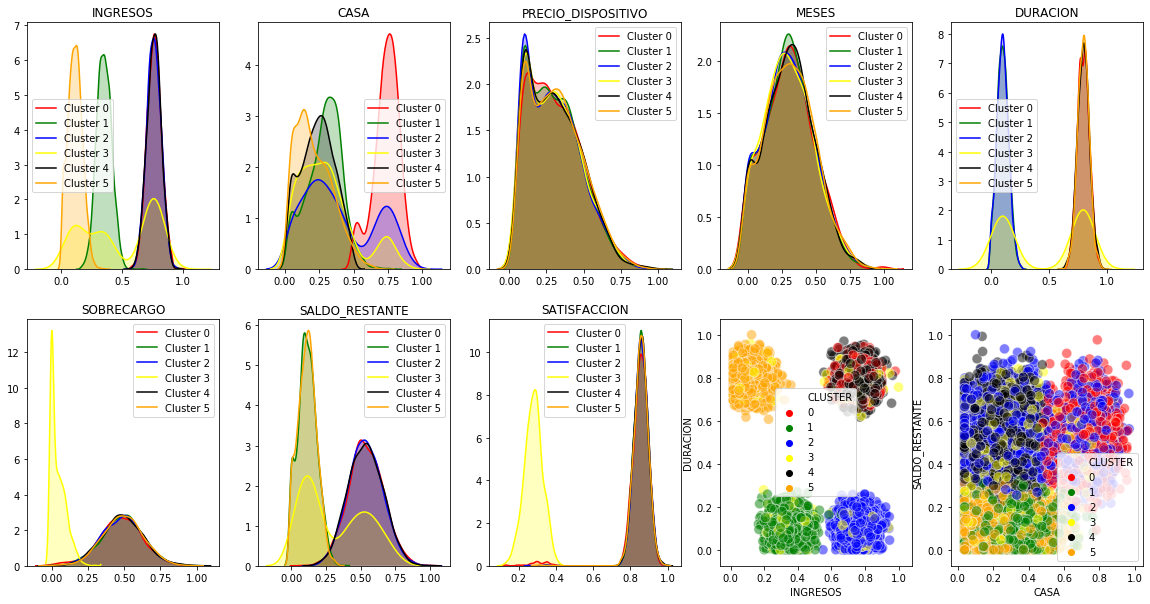

In [64]:
j = 3
colors = ['r', 'g', 'b', 'yellow', 'black', 'orange']
for clu in clusters_arr:
    data_ret.loc[:,'CLUSTER'] = clu
    fig = plt.figure(figsize=(20,10))
    
    i=1
    for var in data_ret.columns[1:9]:
        ax = fig.add_subplot(math.ceil(len(data_ret.columns[1:9])/5), 5, i)
        
        poss = np.arange(j)
        legend = [''  for x in range(j)]
        for pos in poss:
            sns.kdeplot(data_ret.loc[data_ret.CLUSTER==pos][var], shade=True, color=colors[pos], ax=ax)
            legend[pos] = 'Cluster '+ str( pos )
            
        plt.title(var)
        plt.legend(legend)
        i+=1
    
    ax = fig.add_subplot(math.ceil(len(data_ret.columns[1:9])/5), 5, i)
    sns.scatterplot(x="INGRESOS", y="DURACION", hue="CLUSTER", data=data_ret, ax=ax, palette=colors[:j], s=100, alpha=0.5)
    ax = fig.add_subplot(math.ceil(len(data_ret.columns[1:9])/5), 5, i+1)
    sns.scatterplot(x="CASA", y="SALDO_RESTANTE", hue="CLUSTER", data=data_ret, ax=ax, palette=colors[:j], s=100, alpha=0.5)
    
    j+=1

**Podemos ver como indiferentemente de la cantidad de clusters, la variable "INGRESOS" tiene un muy buen comportamiento diferenciando los grupos de usuarios. Además hay dos grupos claros consistentes desde la variable de "DURACION", y la variable "CASA" tiene tambien un comportamiento ligeramente diferencial**

## **Escogencia del K**

### Metodo del Codo y Calinski Habaraz

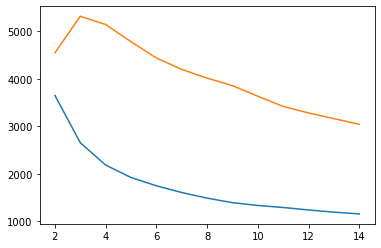

In [65]:
WSSs = []
CHs = []

for k in range(2,15) :
    km = KMeans(n_clusters=k, random_state=12345, n_init=10)
    km.fit(data_ret.iloc[:,1:9])
    WSSs.append(km.inertia_)
    CH = calinski_harabaz_score(data_ret.iloc[:,1:9], km.labels_) 
    CHs.append(CH)
    
plt.plot(range(2, 15), WSSs)
plt.plot(range(2, 15), CHs)

- **El codo estaría en 4,** lo que es interesante, dado que las diferentes visualizaciones scaterplots resaltamos como se pueden diferenciar facilmente 4 clusters
- **Calinski Habaraz estaría en 3,** lo cual difiere del primer método, sin embargo, como se acaba de decir, las visualizaciones apoyan mas los 4 clusters

### Siluetas

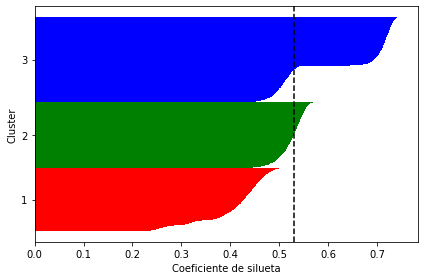

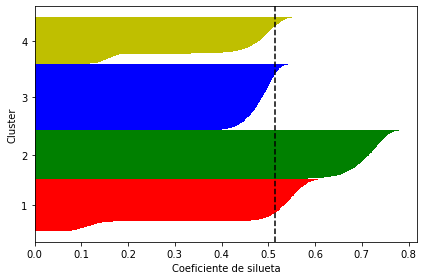

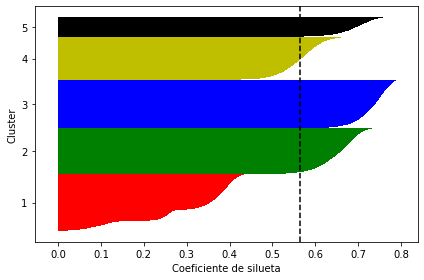

In [66]:
k_kmeans = [3,4,5]
colores = ['r', 'g', 'b', 'y', 'black']

for k in k_kmeans:
    kmeans = KMeans(n_clusters=k, random_state=12345, n_init=10)
    kmeans.fit(data_ret.iloc[:,1:])
    y_clusters = kmeans.labels_
    cluster_labels = np.unique(y_clusters)

    silueta_puntos= silhouette_samples(data_ret.iloc[:,1:], y_clusters, metric='euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        silueta_puntos_c = silueta_puntos[y_clusters == c]
        silueta_puntos_c.sort()
        y_ax_upper += len(silueta_puntos_c)
        color = colores[i]
        plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
                 edgecolor='none', color=color)

        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(silueta_puntos_c)

    silueta_promedio = np.mean(silueta_puntos)
    
    plt.axvline(silueta_promedio, color="black", linestyle="--") 

    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Coeficiente de silueta')

    plt.tight_layout()
    plt.show()

**El método de silueta muestra un K=5** que provee el punto mas ato del promedio y por lo tanto el mejor K, lo cual no apoya ni refuta los anteriores k dado por los anteriores metodos, sin embargo, podemos notar en las visualiaciones que una segmentación igual o mayor a 5 no es apropiada

# Clustering Jerárquico

In [67]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
fusiones = linkage(data_ret.iloc[:,1:], 'ward')

Según se sugiere en las clases, vamos a tomar prestada una función encontrada en https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/ que permite reutilizar los datos devueltos por la función dendrograma para mejorar los dendrogramas:

In [68]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')

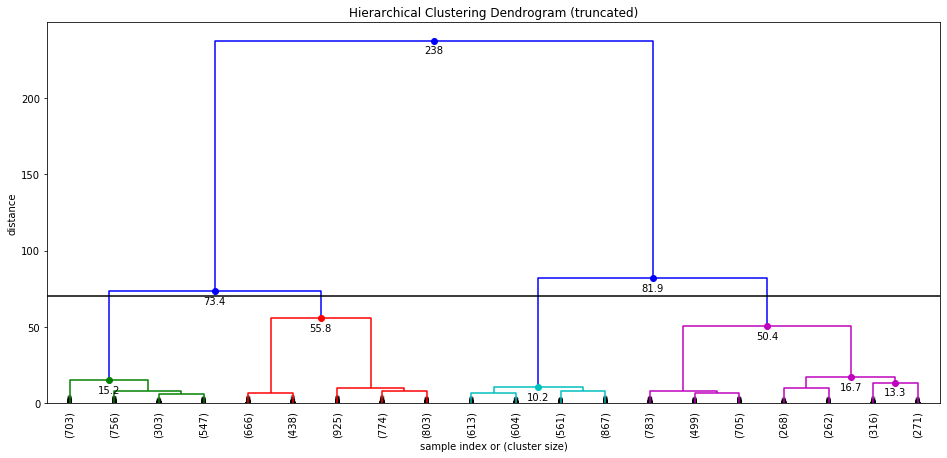

In [69]:
plt.figure(figsize=(16, 7))  
fancy_dendrogram(
    fusiones,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above=10,
    max_d=70
     # plot a horizontal cut-off line
)

Tomamos el K que creemos conveniente especificando la distancia correspondiente **83**, considerando los últimos 50 clusters, dado que tengamos una cantidad de clusters más delimitada.

In [70]:
max_d = 30 #para criterion="distance"
k = 4
clusters = fcluster(fusiones, k, criterion='maxclust')

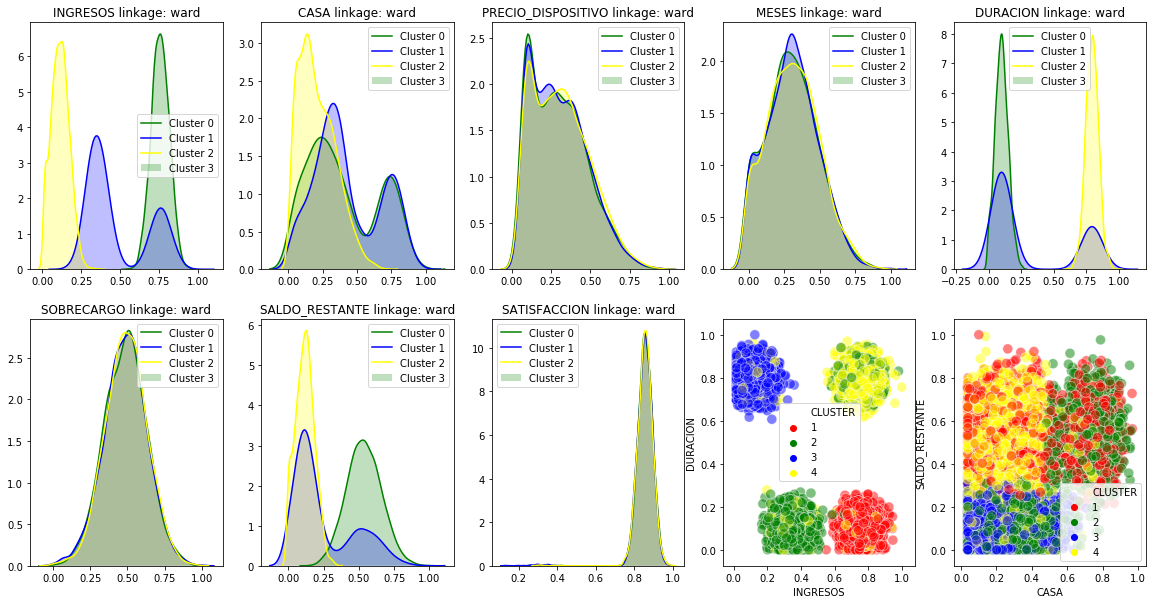

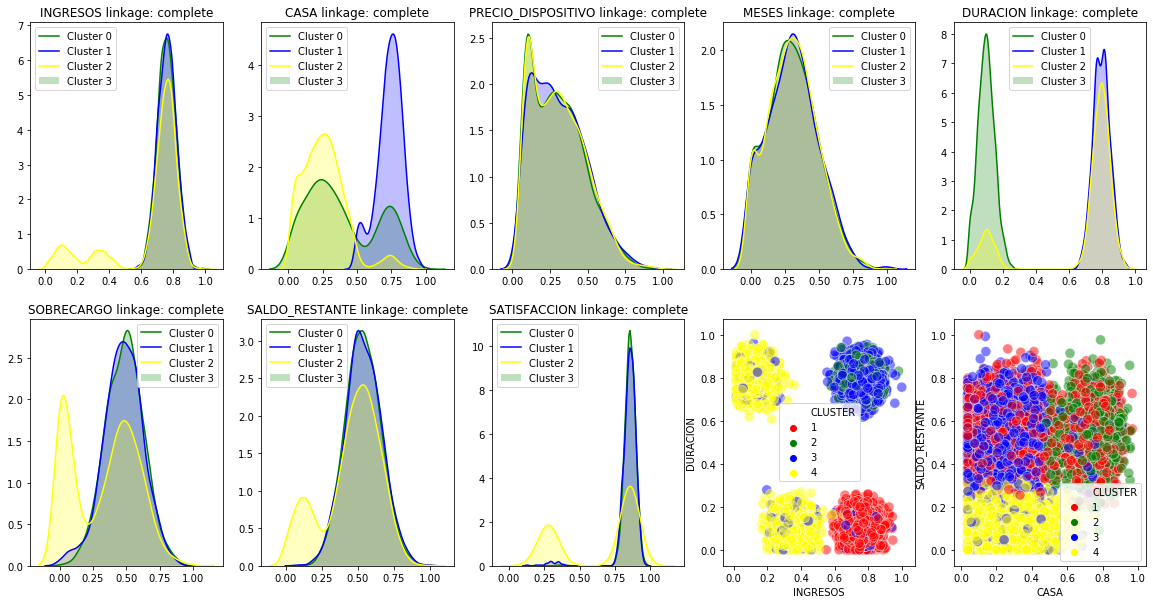

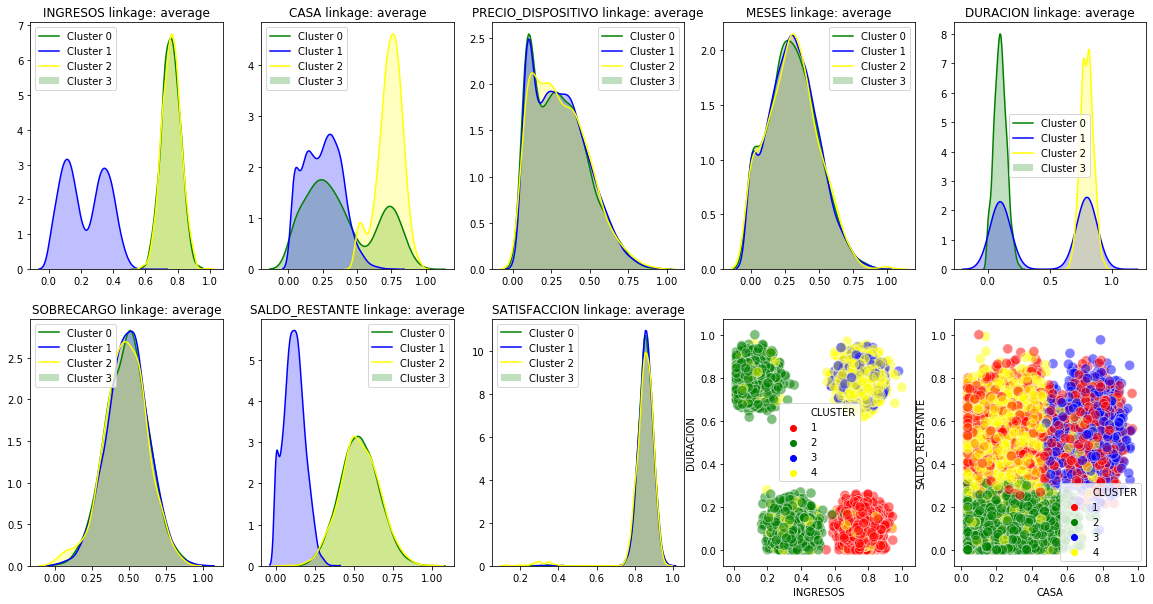

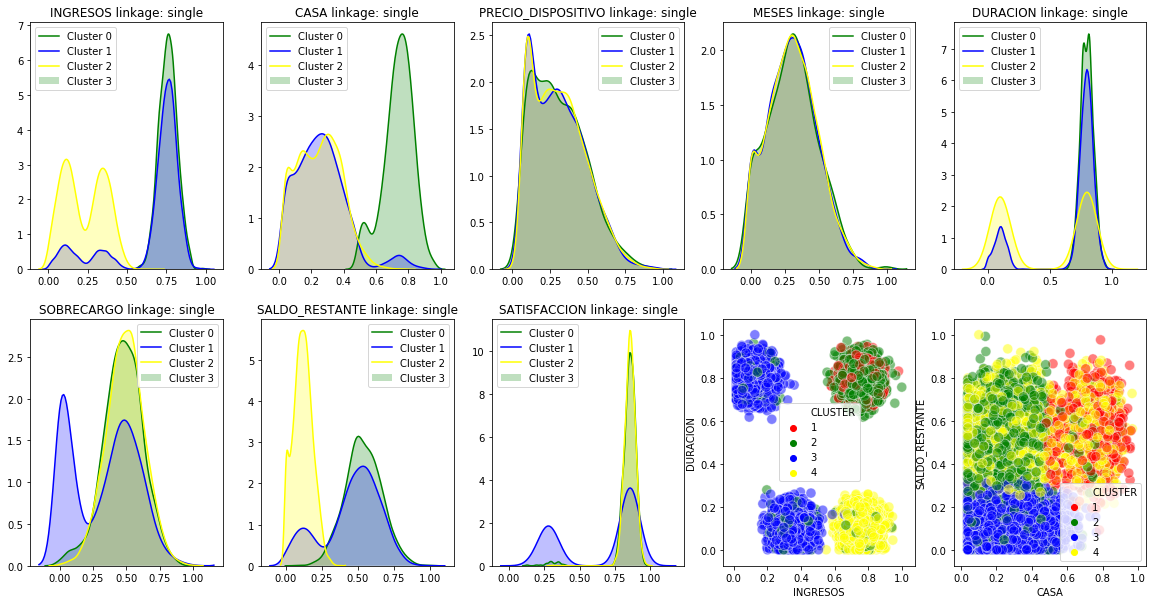

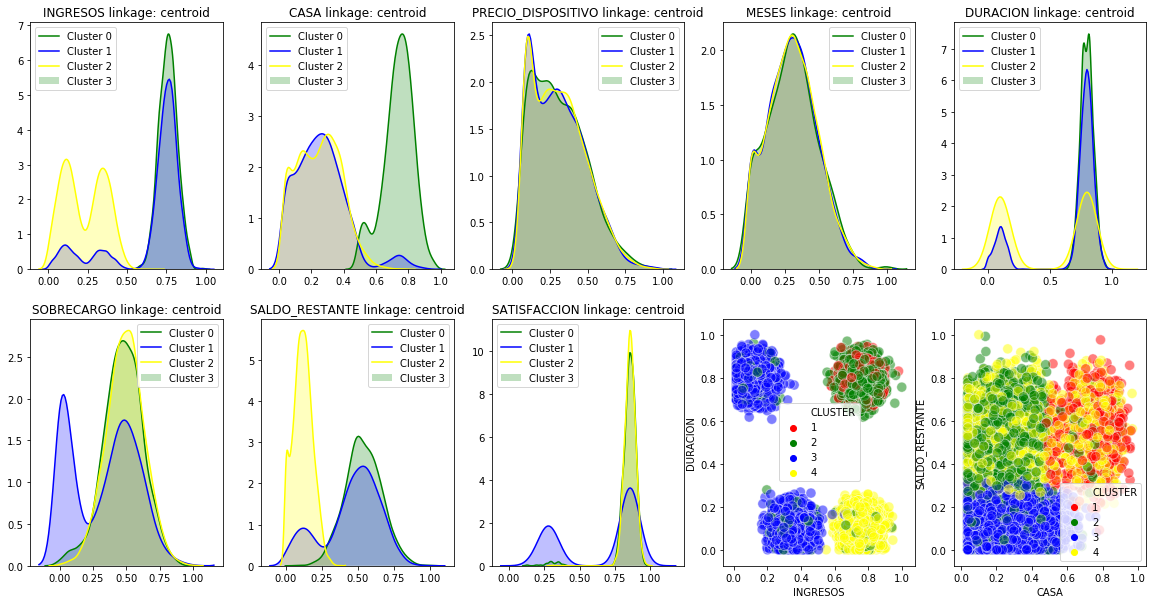

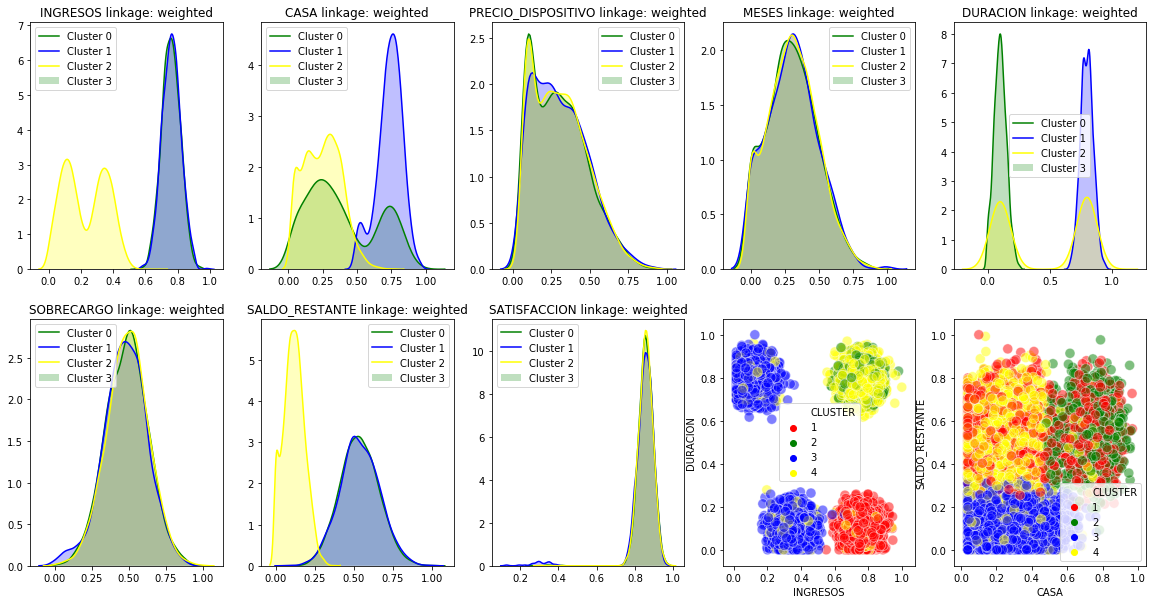

In [71]:
k = 4
links = ['ward', 'complete', 'average', 'single', 'centroid', 'weighted']
colors = ['r', 'g', 'b', 'yellow']
j=1
for link in links:
    fusiones = linkage(data_ret.iloc[:,1:], link)
    clusters = fcluster(fusiones, k, criterion='maxclust')
    data_ret.loc[:,'CLUSTER'] = clusters
    fig = plt.figure(figsize=(20,10))
    
    i=1
    for var in data_ret.columns[1:9]:
        ax = fig.add_subplot(math.ceil(len(data_ret.columns[1:9])/5), 5, i)
        
        legend = [''  for x in range(4)]
        for pos in [0,1,2,3]:
            sns.kdeplot(data_ret.loc[data_ret.CLUSTER==pos][var], shade=True, color=colors[pos], ax=ax)
            legend[pos] = 'Cluster '+ str( pos )
            
        plt.title(var + " linkage: " +link)
        plt.legend(legend)
        i+=1
    
    ax = fig.add_subplot(math.ceil(len(data_ret.columns[1:9])/5), 5, i)
    sns.scatterplot(x="INGRESOS", y="DURACION", hue="CLUSTER", data=data_ret, ax=ax, palette=colors, s=100, alpha=0.5)
    ax = fig.add_subplot(math.ceil(len(data_ret.columns[1:9])/5), 5, i+1)
    sns.scatterplot(x="CASA", y="SALDO_RESTANTE", hue="CLUSTER", data=data_ret, ax=ax, palette=colors, s=100, alpha=0.5)
    
    j+=1

La diferencia entre los tipos de fusion dados para para la clusterización jerarquica, en este caso, no varian mucho, sin embargo, como se puede notar en las graficas, el **linkage que ayudan a distinguir mejor los grupos, es el _"centroid"_** _lo podemos notar en la grafica de INGRESOS, DURACION, SOBRE_CARGO, SALDO_RESTANTE y SATISFACCION, como los clusters estan mas diferenciados que en otras gráficas_ 

### Escogencia del modelo

Observando un paralelo de los scatterPlots dado por cada columna diferenciados por la misma cantidad de clusters, es cláro que el **Cluster Jerarquico** con una fusiòn **centroid** es mucho mas eficiente haciendo distinciones entre grupos de los usuarios RETIRADOS. Por ello, se tomará este como modelo principal.